In [3]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
#Traditional

#ler csv

# -away
ager = pd.read_csv("analitics/traditional_Germany_away.csv")
aita = pd.read_csv("analitics/traditional_Italy_away.csv")
aeng = pd.read_csv("analitics/traditional_England_away.csv")
afra = pd.read_csv("analitics/traditional_France_away.csv")
aspa = pd.read_csv("analitics/traditional_Spain_away.csv")
aeur = pd.read_csv("analitics/traditional_European_Championship_away.csv")
acup = pd.read_csv("analitics/traditional_World_Cup_away.csv")

# -home
hger  = pd.read_csv("analitics/traditional_Germany_home.csv")
hita  = pd.read_csv("analitics/traditional_Italy_home.csv")
heng  = pd.read_csv("analitics/traditional_England_home.csv")
hfra  = pd.read_csv("analitics/traditional_France_home.csv")
hspa  = pd.read_csv("analitics/traditional_Spain_home.csv")
heur  = pd.read_csv("analitics/traditional_European_Championship_home.csv")
hcup  = pd.read_csv("analitics/traditional_World_Cup_home.csv")



In [51]:
#merge dfs
aspa.head()

,matchID,team1_ID,team2_ID,date,tournament,gk_saves_T2,red_card_T2,yellow_card_T2,assists_T2,shots_T2,shots_against_T2,shots_on_target_T2,passes_T2,goals_T2,goals_against_T2,ball_possession_T2,pass_acc_T2,gk_acc_T2,shot_acc_T2
0,2565922,676,687,"May 20, 2018 at 8:45:00 PM GMT+2",Spain,3.0,0.0,2.0,0.0,13,11,2.0,308,0.0,1.0,0.365362,0.855556,0.750000,0.153846
1,2565919,678,691,"May 20, 2018 at 4:15:00 PM GMT+2",Spain,3.0,0.0,1.0,1.0,12,10,4.0,327,1.0,0.0,0.434263,0.803440,1.000000,0.333333
2,2565924,674,677,"May 20, 2018 at 12:00:00 PM GMT+2",Spain,3.0,0.0,0.0,1.0,11,21,6.0,350,1.0,2.0,0.413223,0.833333,0.600000,0.545455
3,2565920,680,696,"May 19, 2018 at 6:30:00 PM GMT+2",Spain,8.0,0.0,2.0,0.0,8,19,2.0,292,0.0,1.0,0.350962,0.808864,0.888889,0.250000
4,2565921,683,698,"May 19, 2018 at 6:30:00 PM GMT+2",Spain,2.0,0.0,1.0,0.0,10,6,3.0,334,1.0,0.0,0.647287,0.787736,1.000000,0.300000


In [6]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5, closed='left', min_periods=2).mean()
    group[new_cols] = rolling_stats
    group = group.drop(cols, axis=1)
    group = group.dropna(subset=new_cols)

    return group

In [7]:
cols = ['gk_saves_T1', 'red_card_T1', 'yellow_card_T1',	'assists_T1', 'shots_T1', 'shots_against_T1', 'shots_on_target_T1', 
        'passes_T1', 'goals_T1', 'goals_against_T1', 'ball_possession_T1', 'pass_acc_T1', 'gk_acc_T1', 'shot_acc_T1']
new_cols = [f"avg_{c}" for c in cols]

heng = heng.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng = heng.droplevel('team1_ID')
hger = hger.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger = hger.droplevel('team1_ID')
hita = hita.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita = hita.droplevel('team1_ID')
hfra = hfra.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra = hfra.droplevel('team1_ID')
hspa = hspa.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa = hspa.droplevel('team1_ID')
heur = heur.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur = heur.droplevel('team1_ID')
hcup = hcup.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup = hcup.droplevel('team1_ID')

In [8]:
cols = ['gk_saves_T2', 'red_card_T2', 'yellow_card_T2',	'assists_T2', 'shots_T2', 'shots_against_T2', 'shots_on_target_T2', 
        'passes_T2', 'goals_T2', 'goals_against_T2', 'ball_possession_T2', 'pass_acc_T2', 'gk_acc_T2', 'shot_acc_T2']
new_cols = [f"avg_{c}" for c in cols]

aeng = aeng.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng = aeng.droplevel('team2_ID')
ager = ager.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager = ager.droplevel('team2_ID')
aita = aita.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita = aita.droplevel('team2_ID')
afra = afra.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra = afra.droplevel('team2_ID')
aspa = aspa.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa = aspa.droplevel('team2_ID')
aeur = aeur.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur = aeur.droplevel('team2_ID')
acup = acup.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup = acup.droplevel('team2_ID')

In [9]:
avg_ger = hger.merge(ager, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_ita = hita.merge(aita, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eng = heng.merge(aeng, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_fra = hfra.merge(afra, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_spa = hspa.merge(aspa, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eur = heur.merge(aeur, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_cup = hcup.merge(acup, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])


In [8]:
avg_ger.to_csv('rolling_avg/stats_avg_ger.csv', encoding='utf-8', index=False)
avg_ita.to_csv('rolling_avg/stats_avg_ita.csv', encoding='utf-8', index=False)
avg_eng.to_csv('rolling_avg/stats_avg_eng.csv', encoding='utf-8', index=False)
avg_fra.to_csv('rolling_avg/stats_avg_fra.csv', encoding='utf-8', index=False)
avg_spa.to_csv('rolling_avg/stats_avg_spa.csv', encoding='utf-8', index=False)
avg_eur.to_csv('rolling_avg/stats_avg_eur.csv', encoding='utf-8', index=False)
avg_cup.to_csv('rolling_avg/stats_avg_cup.csv', encoding='utf-8', index=False)

In [21]:
avg_df = pd.concat([avg_ger, avg_ita, avg_eng, avg_fra, avg_spa, avg_eur, avg_cup], ignore_index=True)

In [22]:
avg_df.shape

(1143, 34)

In [11]:
avg_df.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_gk_saves_T1,avg_red_card_T1,avg_yellow_card_T1,avg_assists_T1,avg_shots_T1,avg_shots_against_T1,avg_shots_on_target_T1,avg_passes_T1,avg_goals_T1,avg_goals_against_T1,avg_ball_possession_T1,avg_pass_acc_T1,avg_gk_acc_T1,avg_shot_acc_T1,avg_gk_saves_T2,avg_red_card_T2,avg_yellow_card_T2,avg_assists_T2,avg_shots_T2,avg_shots_against_T2,avg_shots_on_target_T2,avg_passes_T2,avg_goals_T2,avg_goals_against_T2,avg_ball_possession_T2,avg_pass_acc_T2,avg_gk_acc_T2,avg_shot_acc_T2
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
England,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
European_Championship,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
France,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230
Germany,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179
Italy,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
Spain,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
World_Cup,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [41]:
def split_dataset(df):
    #Separando dados e target
    X = df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
    y = df['winner'] 
    col_names = X.columns
    idx = df['matchID']

    #Separando treino e teste
    Xtrain, Xtest, y_train, y_test = train_test_split(X,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)

    #Normalizando os dados
    scaler = StandardScaler().fit(Xtrain)
    X_train = scaler.transform(Xtrain)
    X_test = scaler.transform(Xtest)

    train_df = pd.DataFrame(X_train, columns=col_names)
    test_df = pd.DataFrame(X_test, columns=col_names)

    return train_df, test_df, y_train, y_test

In [13]:
#Métricas de avaliação
def evaluation_metrics(clf,test_x, test_y, pred_y, ax_1, ax_2):
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    f1 = f1_score(test_y, pred_y)
        
    plot_precision_recall_curve(clf, test_x, test_y, ax=ax_1)
    plot_roc_curve(clf, test_x, test_y, ax=ax_2)
    
    return accuracy, precision, recall, f1

In [44]:
def logistic_regression(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para logistic regression
           
    #Define Parameter Space for Optimization
    space = {
        'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
        'penalty': hp.choice('penalty', ['l1', 'l2']),
        'max_iter': hp.quniform('max_iter', 100, 700, 100),
        'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
        'class_weight' : hp.choice('class_weight', ['balanced', None])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=5, scoring='accuracy', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=10, 
        trials=trials
    )

    print("Logistic Regression - Best: {}".format(best))
    
    logi = LogisticRegression(
        C=[0.001, 0.01, 0.1, 1, 10, 100, 1000][best['C']],
        penalty=['l1', 'l2'][best['penalty']], 
        solver=['liblinear', 'saga'][best['solver']], 
        max_iter=best['max_iter'], 
        class_weight=['balanced', None][best['class_weight']])

    return logi

In [15]:
def random_forest(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para Random Forest

    #Define Parameter Space for Optimization
    space = {
        "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
        "max_depth": hp.quniform("max_depth", 2, 24, 2),
        "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
        "criterion": hp.choice("criterion", ["gini", "entropy"]),
        "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
        "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
        "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
        "bootstrap": hp.choice("bootstrap", [True, False])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        model = RandomForestClassifier(**params, n_jobs=-1)
        f1 = cross_val_score(model, train_x, train_y, cv = 10, scoring='accuracy', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print(" Random Forest - Best: {}".format(best))


    rf = RandomForestClassifier(
        n_estimators=[100, 200, 300, 400,500][3],
        max_depth=best['max_depth'],
        max_features=['auto', 'sqrt', 'log2'][best['max_features']],
        criterion=["gini", "entropy"][best['criterion']],
        min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
        min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
        random_state=42,
        class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
        bootstrap=[True, False][best['bootstrap']],
        n_jobs = -1)

    return rf

In [16]:
def xgboosting(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para XGBoosting

    #Define Parameter Space for Optimization
    space = {
    'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
    'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print("XGBoosting - Best: {}".format(best))

    xgb = XGBClassifier(
        learning_rate=best['learning_rate'],
        n_estimators=range(50, 400, 10)[best['n_estimators']],
        max_depth=range(5, 15, 1)[best['max_depth']],
        min_child_weight=best['min_child_weight'],
        gamma=best['gamma'],
        subsample=best['subsample'],
        colsample_bytree=best['colsample_bytree'],
        objective= 'binary:logistic',
        scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

    return xgb

In [17]:
def testa_modelos(train_x, train_y, test_x, test_y):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

    logi = logistic_regression(train_x, train_y)
    rf = random_forest(train_x, train_y)
    xgb = xgboosting(train_x, train_y)

    for clf, name in [(logi, 'LogisticRegression'),
                      (rf, 'RandomForest'),
                      (xgb, 'XGBClassifier')]:
        
        cv = cross_val_score(clf,train_x,train_y, cv = 10 , scoring='accuracy')
        CrossValMean = cv.mean()
        CrossValSTD = cv.std()
        print("")
        print(f"{name}:")
        print(f"CrossVal (mean/std): {100*CrossValMean:.3f}% / {100*CrossValSTD:.3f}%")
        
        clf.fit(train_x, train_y)
        y_pred = clf.predict(test_x)

        accuracy, precision, recall, f1 = evaluation_metrics(clf, test_x, test_y, y_pred, ax1, ax2)
        print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
    
    ax1.legend(loc="right")
    ax1.set_title('Precision-Recall curve')
    
    ax2.legend(loc="right")
    ax2.set_title('ROC AUC curve')

In [42]:
X_train, X_test, y_train, y_test = split_dataset(avg_df)

100%|██████████| 10/10 [00:01<00:00,  8.04trial/s, best loss: -0.70875]
Logistic Regression - Best: {'C': 3, 'class_weight': 1, 'max_iter': 400.0, 'penalty': 0, 'solver': 0}
100%|██████████| 20/20 [01:13<00:00,  3.68s/trial, best loss: -0.7125] 
 Random Forest - Best: {'bootstrap': 0, 'class_weight': 1, 'criterion': 1, 'max_depth': 18.0, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 4, 'n_estimators': 3}
100%|██████████| 20/20 [00:34<00:00,  1.74s/trial, best loss: -0.6912499999999999]
XGBoosting - Best: {'colsample_bytree': 0.65, 'gamma': 0.22, 'learning_rate': 0.22, 'max_depth': 4, 'min_child_weight': 7.0, 'n_estimators': 26, 'scale_pos_weight': 5, 'subsample': 1.0}

LogisticRegression:
CrossVal (mean/std): 69.250% / 4.848%
accuracy: 67.64% | precision: 70.42% | recall: 80.86% | f1: 75.28%

RandomForest:
CrossVal (mean/std): 72.375% / 2.875%
accuracy: 67.93% | precision: 70.71% | recall: 80.86% | f1: 75.45%

XGBClassifier:
CrossVal (mean/std): 68.750% / 3.354%
accura

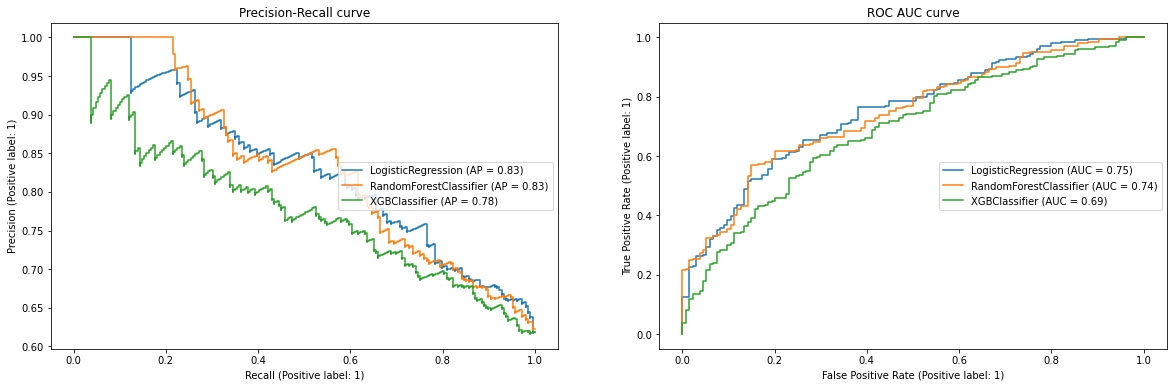

In [45]:
testa_modelos(X_train, y_train, X_test, y_test)

0 colunas removidas com VarianceThreshold(0)
8 colunas removidas com correlação > |0.8|
100%|██████████| 10/10 [00:14<00:00,  1.47s/trial, best loss: -0.7826314350717544]
Logistic Regression - Best: {'C': 0, 'class_weight': 1, 'max_iter': 600.0, 'penalty': 1, 'solver': 1}
100%|██████████| 20/20 [01:27<00:00,  4.36s/trial, best loss: -0.7162499999999999]
 Random Forest - Best: {'bootstrap': 1, 'class_weight': 2, 'criterion': 1, 'max_depth': 8.0, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1}
100%|██████████| 20/20 [00:35<00:00,  1.75s/trial, best loss: -0.69375]          
XGBoosting - Best: {'colsample_bytree': 0.53, 'gamma': 0.03, 'learning_rate': 0.07, 'max_depth': 2, 'min_child_weight': 6.0, 'n_estimators': 13, 'scale_pos_weight': 4, 'subsample': 0.65}

LogisticRegression:
CrossVal (mean/std): 67.500% / 4.183%
accuracy: 65.89% | precision: 65.13% | recall: 94.74% | f1: 77.19%

RandomForest:
CrossVal (mean/std): 71.125% / 3.685%
accuracy: 67.06% |

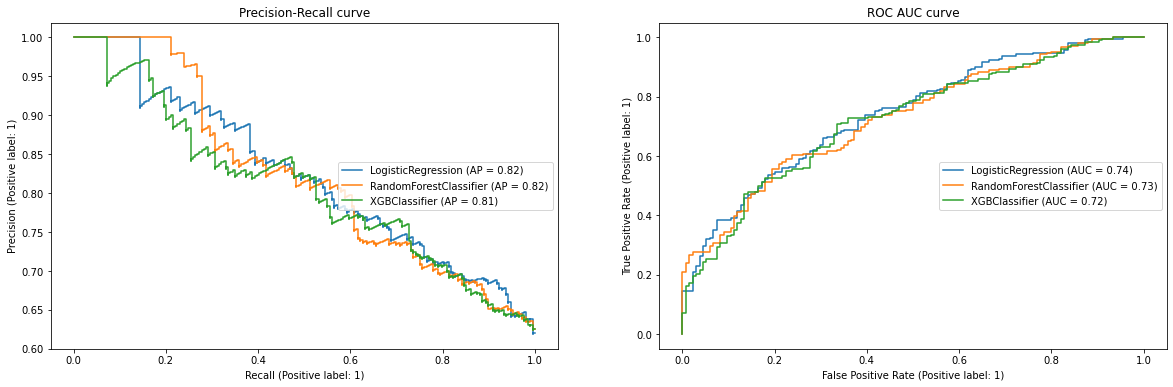

In [40]:
def feature_selection(data, threshold):   
    
    #removendo features com 0 de variância
    selector = VarianceThreshold()
    selector.fit_transform(data)
    df_var = data.loc[:, selector.get_support()]
    print(f"{len(data.columns) - len(df_var.columns)} colunas removidas com VarianceThreshold(0)")
    
    #removendo features com correlação alta
    corr = df_var.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = df_var.columns[columns]
    df_corr = df_var[selected_columns]    
    print(f"{len(df_var.columns) - len(df_corr.columns)} colunas removidas com correlação > |{threshold}|")
    
    return df_corr

#Separando dados e target
X_train, X_test, y_train, y_test = split_dataset(avg_df)

#aplicando feature selection
X_train_sel = feature_selection(X_train, 0.8)

col_names = X_train_sel.columns
X_test_sel = X_test[col_names]

testa_modelos(X_train_sel, y_train, X_test_sel, y_test)


## Por times

In [27]:
#GER
X_train_ger, X_test_ger, y_train_ger, y_test_ger = split_dataset(avg_ger)
#ENG
X_train_eng, X_test_eng, y_train_eng, y_test_eng = split_dataset(avg_eng)
#ITA
X_train_ita, X_test_ita, y_train_ita, y_test_ita = split_dataset(avg_ita)
#FRA
X_train_fra, X_test_fra, y_train_fra, y_test_fra = split_dataset(avg_fra)
#SPA
X_train_spa, X_test_spa, y_train_spa, y_test_spa = split_dataset(avg_spa)

In [35]:
def testa_modelos_times(df_ger, df_eng, df_ita, df_fra, df_spa):
    
    cvmean = []
    cvstd = []
    acc = []
    auc = []

    for df in [df_ger, df_eng, df_ita, df_fra, df_spa]:
        
        train_x, test_x, train_y, test_y = split_dataset(df)

        logi = logistic_regression(train_x, train_y)
        rf = random_forest(train_x, train_y)
        xgb = xgboosting(train_x, train_y)

        for clf, name in [(logi, 'LogisticRegression'),
                        (rf, 'RandomForest'),
                        (xgb, 'XGBClassifier')]:
            
            cv = cross_val_score(clf,train_x,train_y, cv = 10 , scoring='accuracy')
            cvmean.append(cv.mean())
            cvstd.append(cv.std())

            clf.fit(train_x, train_y)
            y_pred = clf.predict(test_x)

            acc.append(accuracy_score(test_y, y_pred))
            auc.append(roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1]))

    print('GER:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[0]:.3f}% / {100*cvstd[0]:.3f}% | acc: {100*acc[0]:.3f}% | auc: {100*auc[0]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[1]:.3f}% / {100*cvstd[1]:.3f}% | acc: {100*acc[1]:.3f}% | auc: {100*auc[1]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[2]:.3f}% / {100*cvstd[2]:.3f}% | acc: {100*acc[2]:.3f}% | auc: {100*auc[2]:.3f}%")
    print('ENG:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[3]:.3f}% / {100*cvstd[3]:.3f}% | acc: {100*acc[3]:.3f}% | auc: {100*auc[3]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[4]:.3f}% / {100*cvstd[4]:.3f}% | acc: {100*acc[4]:.3f}% | auc: {100*auc[4]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[5]:.3f}% / {100*cvstd[5]:.3f}% | acc: {100*acc[5]:.3f}% | auc: {100*auc[5]:.3f}%")
    print('ITA:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[6]:.3f}% / {100*cvstd[6]:.3f}% | acc: {100*acc[6]:.3f}% | auc: {100*auc[6]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[7]:.3f}% / {100*cvstd[7]:.3f}% | acc: {100*acc[7]:.3f}% | auc: {100*auc[7]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[8]:.3f}% / {100*cvstd[8]:.3f}% | acc: {100*acc[8]:.3f}% | auc: {100*auc[8]:.3f}%")
    print('FRA:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[9]:.3f}% / {100*cvstd[9]:.3f}% | acc: {100*acc[9]:.3f}% | auc: {100*auc[9]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[10]:.3f}% / {100*cvstd[10]:.3f}% | acc: {100*acc[10]:.3f}% | auc: {100*auc[10]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[11]:.3f}% / {100*cvstd[11]:.3f}% | acc: {100*acc[11]:.3f}% | auc: {100*auc[11]:.3f}%")
    print('SPA:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[12]:.3f}% / {100*cvstd[12]:.3f}% | acc: {100*acc[12]:.3f}% | auc: {100*auc[12]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[13]:.3f}% / {100*cvstd[13]:.3f}% | acc: {100*acc[13]:.3f}% | auc: {100*auc[13]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[14]:.3f}% / {100*cvstd[14]:.3f}% | acc: {100*acc[14]:.3f}% | auc: {100*auc[14]:.3f}%")


In [46]:
testa_modelos_times(avg_ger, avg_eng, avg_ita, avg_fra, avg_spa)

100%|██████████| 10/10 [00:17<00:00,  1.71s/trial, best loss: -0.6319999999999999]
Logistic Regression - Best: {'C': 2, 'class_weight': 0, 'max_iter': 200.0, 'penalty': 1, 'solver': 1}
100%|██████████| 20/20 [01:23<00:00,  4.18s/trial, best loss: -0.6711538461538462]
 Random Forest - Best: {'bootstrap': 0, 'class_weight': 2, 'criterion': 0, 'max_depth': 22.0, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 3}
100%|██████████| 20/20 [00:22<00:00,  1.12s/trial, best loss: -0.6532051282051283]
XGBoosting - Best: {'colsample_bytree': 0.63, 'gamma': 0.07, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 4.0, 'n_estimators': 18, 'scale_pos_weight': 15, 'subsample': 0.25}
100%|██████████| 10/10 [00:00<00:00, 18.50trial/s, best loss: -0.6958333333333333]
Logistic Regression - Best: {'C': 1, 'class_weight': 1, 'max_iter': 200.0, 'penalty': 1, 'solver': 1}
100%|██████████| 20/20 [01:18<00:00,  3.94s/trial, best loss: -0.6716911764705882]
 Random Forest 